In [126]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [127]:
#read in csv
def read_csv(path, strDate, strDateFormat):
    intSuccess = 0
    if strDateFormat != '':
        df = pd.read_csv(path, delimiter=',')
        df = df.iloc[0:35]
        df[strDate] = pd.to_datetime(datetime.strptime(df[strDate]+strDateFormat), '%Y-%m-%d')
        df.set_index(strDate, drop=True, inplace=True)

    else:
        df = pd.read_csv(path,delimiter=',',parse_dates = True,
            infer_datetime_format = True,
            index_col = strDate
            )
        df.index = pd.to_datetime(df.index, format='%Y-%m-%d')
        df.set_index('YearMonth', drop=True, inplace=True)
    if df.count != 0:
        intSuccess = 1
    return df, intSuccess

In [128]:
def create_Monthly_Avg(path, strDate, idxColumn):
    df = pd.read_csv(path,delimiter=',')
    df['YearMonth'] = pd.to_datetime(df[strDate]).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))
    df['YearMonth'] =pd.to_datetime(df.YearMonth)
    res = df.groupby('YearMonth')[idxColumn].mean()
    res.loc['2010-09':'2020-02']
    return res

In [129]:
def show_plot_twoYs (df, colName0, colName1, colName2, fileName):
    #create two axis
    # create figure and axis objects with subplots()
    fig,ax = plt.subplots(figsize=(30,10))
    # make a plot
    ax.plot(df.index, df[colName1], color="red", marker="o")
    # set x-axis label
    ax.set_xlabel('Date',fontsize=14)
    # set y-axis label
    ax.set_ylabel(colName1,color="red",fontsize=14)
    
    # twin object for two different y-axis on the sample plot
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(df.index, df[colName2],color="blue",marker="o")
    ax2.set_ylabel(colName2,color="blue",fontsize=14)
    plt.show()
    # save the plot as a file
    fig.savefig(fileName + '.jpg',
                format='jpeg',
                dpi=100,
                bbox_inches='tight')

In [130]:
def combine_year_month(path):
    df = pd.read_csv(path,delimiter=',')
    df['Year'] = df['Year'].astype(str)
    df['Month'] = df['Month'].astype(str)
    df['day'] = '1'
    df['YearMonth'] = df[['Year', 'Month', 'day']].agg('-'.join, axis=1)
    df.drop(['Year', 'Month', 'day'], axis=1, inplace=True)
    df['YearMonth'] =pd.to_datetime(df.YearMonth)
    df.set_index('YearMonth', drop=True, inplace=True)
    df = df.loc['2010-09':'2020-02']
    return df

In [131]:
#read in crude price
strFile = 'crude_wti_futures_history_data.csv'
# # p = Path('../Data')
# print(os.getcwd())
# # print(sys.argv[0])
# print(os.path.dirname(os.path.realpath('__file__')))
# base_path = os.getcwd()
base_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
p = base_path + "\\data\\"
print(p)
dfMonlthlyPrices = create_Monthly_Avg(Path(p,strFile), 'Date', ['Price','Open','High','Low','Vol.'])

C:\Users\James McClure\Oil_Price_Prediction\data\


In [132]:
#read in GDP compare data and join
strFile = 'US_GDP_Monthly.csv'
# base_path = os.getcwd()
# p = base_path + "\\data\\"
base_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
p = base_path + "\\data\\"
# dfJoining, intSuccess = read_csv(Path(p,strFile), 'DATE', '')
dfJoining = create_Monthly_Avg(Path(p,strFile), 'DATE', 'USALORSGPNOSTSAM')

In [133]:
#concat monthly price and gdp
joined_GDP_df = pd.concat([dfMonlthlyPrices, dfJoining], axis=1)
joined_GDP_df = joined_GDP_df.loc['2010-09':'2020-02']
joined_GDP_df.head()

,Price,Open,High,Low,USALORSGPNOSTSAM
YearMonth,,,,,
2010-09-01,75.548571,75.143810,76.315714,74.225238,99.654161
2010-10-01,81.974762,81.940952,82.971429,80.849524,99.679121
2010-11-01,84.314762,84.276667,85.313810,83.221429,99.668794
2010-12-01,89.233182,88.838636,89.875000,88.139091,99.629108
2011-01-01,89.578500,89.611000,90.704000,88.375000,99.576283


In [134]:
#establish correlation
corrrelation    = joined_GDP_df.corr(method='pearson'); #'kendall', 'spearman', 'pearson'
print("Pearson correlation coefficient:");
print(corrrelation['USALORSGPNOSTSAM']);
#very low correlation; pearson showed the highest

Pearson correlation coefficient:
Price              -0.395278
Open               -0.393528
High               -0.393556
Low                -0.394819
USALORSGPNOSTSAM    1.000000
Name: USALORSGPNOSTSAM, dtype: float64


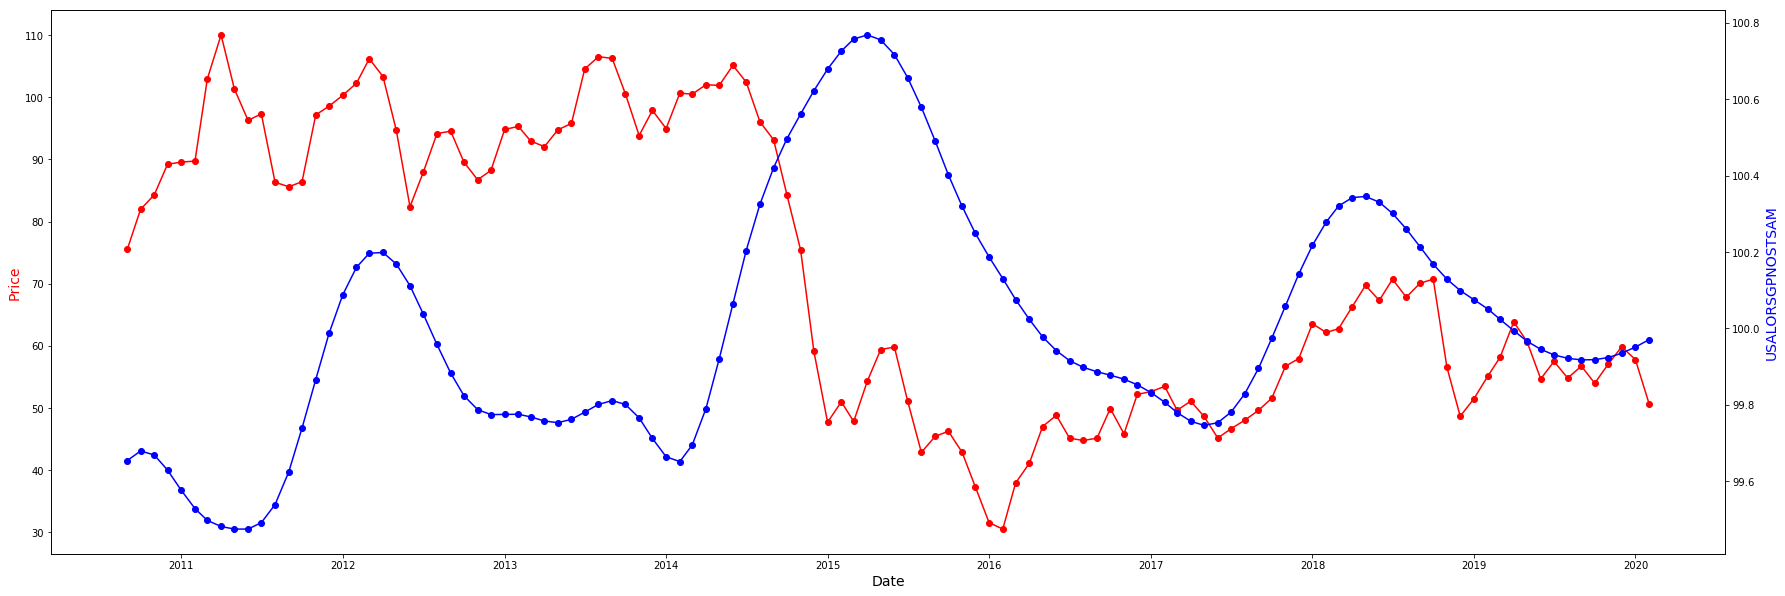

In [135]:
#check table shape
joined_GDP_df.head(10)
#plot the data
show_plot_twoYs (joined_GDP_df, joined_GDP_df.index, 'Price', 'USALORSGPNOSTSAM', 'GDP')

In [136]:
#read in US Oil Production compare data
strFile = 'us-crude-oil-production-historical-chart.csv'
# base_path = os.getcwd()
# p = base_path + "\\data\\"
base_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
p = base_path + "\\data\\"
dfJoining = create_Monthly_Avg(Path(p,strFile), 'date', 'value')

In [137]:
#concat oil prod and price monthly data
joined_Oil_Production_df = pd.concat([dfMonlthlyPrices, dfJoining], axis=1)
joined_Oil_Production_df = joined_Oil_Production_df.loc['2010-09':'2020-02']
joined_Oil_Production_df.head()

,Price,Open,High,Low,value
YearMonth,,,,,
2010-09-01,75.548571,75.143810,76.315714,74.225238,5562
2010-10-01,81.974762,81.940952,82.971429,80.849524,5593
2010-11-01,84.314762,84.276667,85.313810,83.221429,5555
2010-12-01,89.233182,88.838636,89.875000,88.139091,5598
2011-01-01,89.578500,89.611000,90.704000,88.375000,5568


In [138]:
#establish correlation
corrrelation    = joined_Oil_Production_df.corr(method='pearson'); #'kendall', 'spearman', 'pearson'
print("Pearson correlation coefficient:");
print(corrrelation['value']);
#very low correlation; pearson showed the highest; 1 = perfect positive correlation; -1 perfect negative correlation

Pearson correlation coefficient:
Price   -0.638788
Open    -0.637873
High    -0.641758
Low     -0.634397
value    1.000000
Name: value, dtype: float64


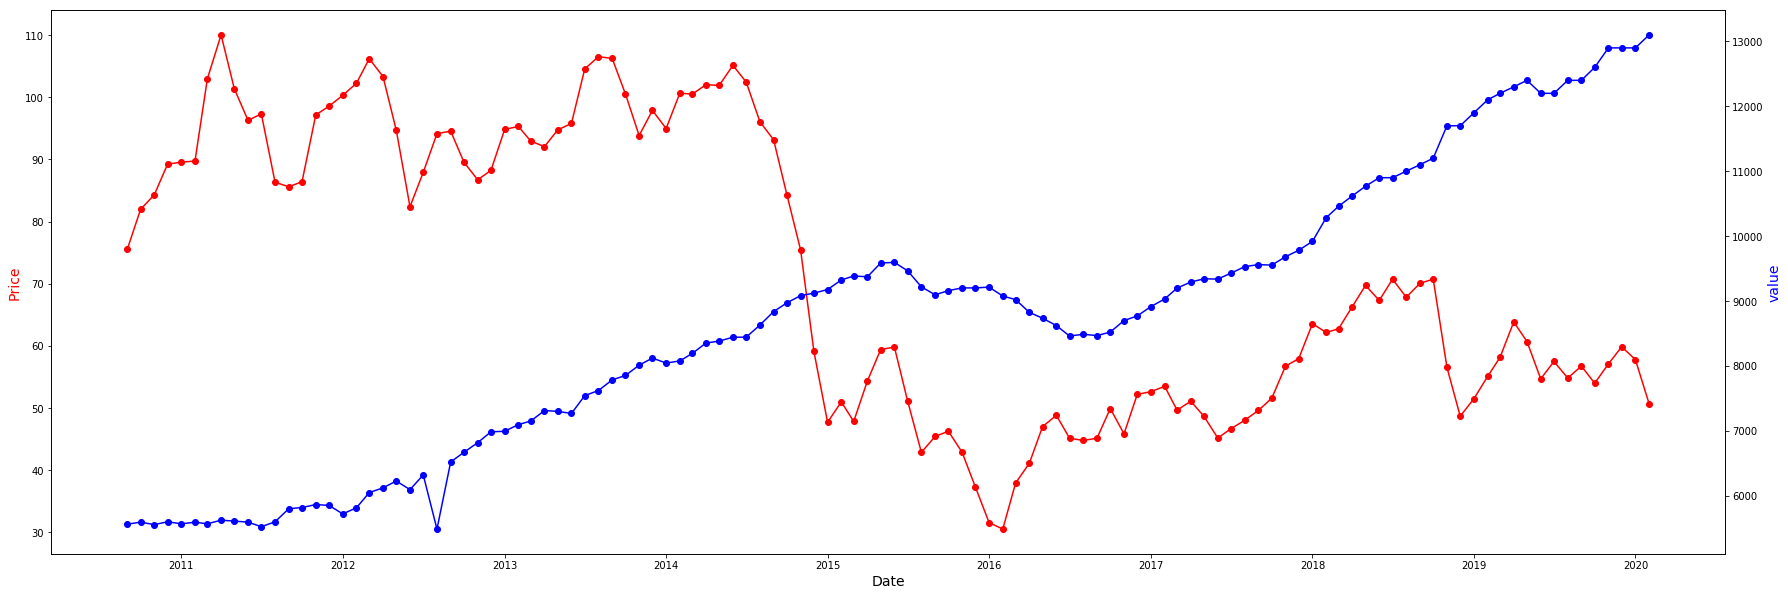

In [139]:
#check table shape
# joined_Oil_Production_df.info
#plot the data
show_plot_twoYs (joined_Oil_Production_df, joined_Oil_Production_df.index, 'Price', 'value', 'OilProduction')

In [140]:
#read in US Housing Starts compare data
strFile = 'housing-starts-historical-chart.csv'
# base_path = os.getcwd()
# p = base_path + "\\data\\"
base_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
p = base_path + "\\data\\"
dfHS = create_Monthly_Avg(Path(p,strFile), 'date', 'value')
# print(dfJoining.head())

In [141]:
#inner join on index
joined_HousingStarts_df = pd.concat([dfMonlthlyPrices, dfHS], axis=1)
joined_HousingStarts_df = joined_Oil_Production_df.loc['2010-09':'2020-02']
joined_HousingStarts_df.head()

,Price,Open,High,Low,value
YearMonth,,,,,
2010-09-01,75.548571,75.143810,76.315714,74.225238,5562
2010-10-01,81.974762,81.940952,82.971429,80.849524,5593
2010-11-01,84.314762,84.276667,85.313810,83.221429,5555
2010-12-01,89.233182,88.838636,89.875000,88.139091,5598
2011-01-01,89.578500,89.611000,90.704000,88.375000,5568


In [142]:
#establish correlation
corrrelation    = joined_HousingStarts_df.corr(method='pearson'); #'kendall', 'spearman', 'pearson'
print("Pearson correlation coefficient:");
print(corrrelation['value']);
#very low correlation; pearson showed the highest; 1 = perfect positive correlation; -1 perfect negative correlation

Pearson correlation coefficient:
Price   -0.638788
Open    -0.637873
High    -0.641758
Low     -0.634397
value    1.000000
Name: value, dtype: float64


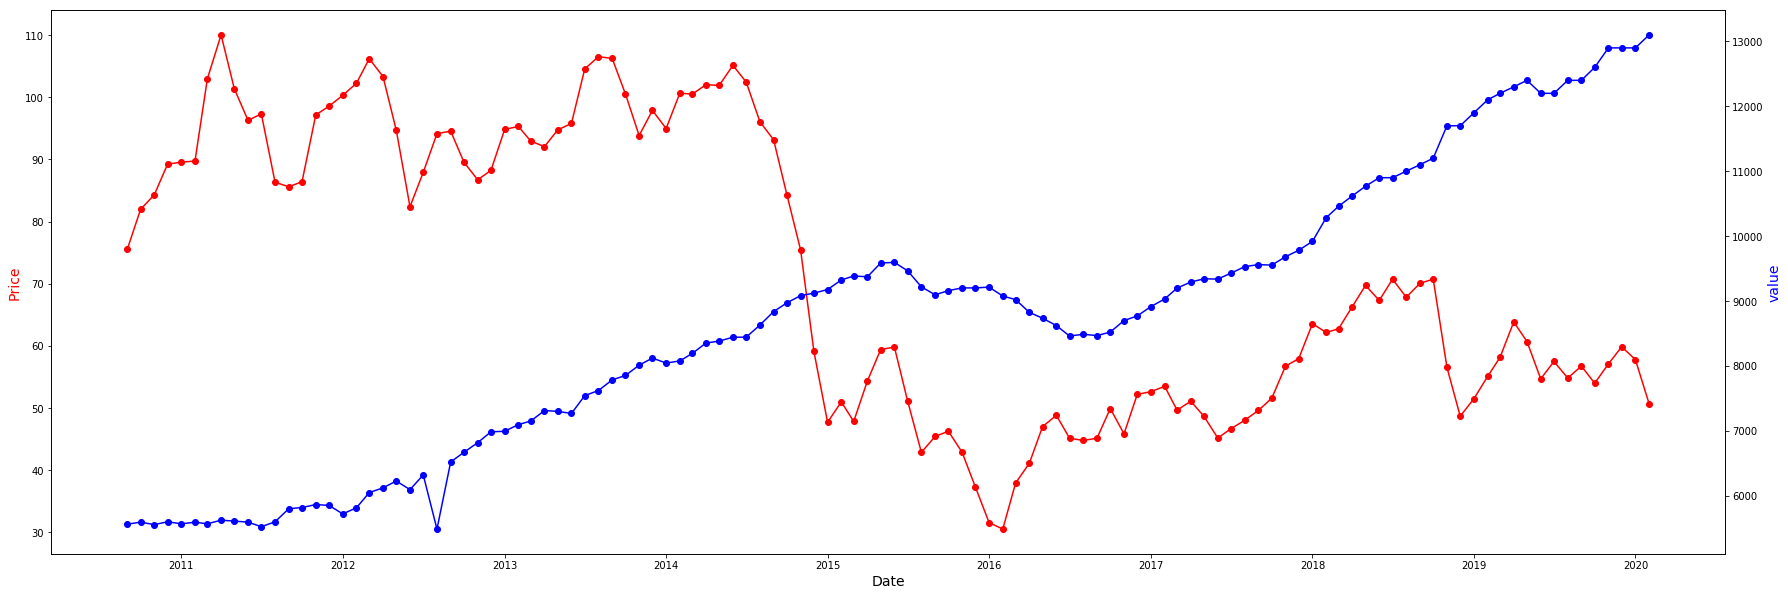

In [143]:
#check table shape
joined_HousingStarts_df.info
#plot the data
show_plot_twoYs (joined_HousingStarts_df, joined_HousingStarts_df.index, 'Price', 'value', 'HousingStarts')

In [144]:
#load rig count data
#read in US Housing Starts compare data
strFile = 'Worldwide Rig Count Aug 2020.csv'
# base_path = os.getcwd()
# p = base_path + "\\data\\"
base_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
p = base_path + "\\data\\"
p = p + strFile
dfRigCount = combine_year_month(p)
print(dfRigCount)

            RigCount
YearMonth           
2010-09-01      3122
2010-10-01      3165
2010-11-01      3233
2010-12-01      3227
2011-01-01      3436
2011-02-01      3536
2011-03-01      3434
2011-04-01      3103
2011-05-01      3130
2011-06-01      3257
2011-07-01      3397
2011-08-01      3613
2011-09-01      3662
2011-10-01      3722
2011-11-01      3683
2011-12-01      3612
2012-01-01      3751
2012-02-01      3900
2012-03-01      3663
2012-04-01      3298
2012-05-01      3335
2012-06-01      3484
2012-07-01      3516
2012-08-01      3490
2012-09-01      3468
2012-10-01      3458
2012-11-01      3461
2012-12-01      3390
2013-01-01      3539
2013-02-01      3679
...              ...
2017-09-01      2081
2017-10-01      2077
2017-11-01      2057
2017-12-01      2089
2018-01-01      2175
2018-02-01      2271
2018-03-01      2179
2018-04-01      2087
2018-05-01      2096
2018-06-01      2152
2018-07-01      2251
2018-08-01      2278
2018-09-01      2258
2018-10-01      2271
2018-11-01   

In [145]:
#join rig count data
joined_RigCount_df= pd.merge(dfMonlthlyPrices, dfRigCount, left_index=True, right_index=True, how='inner')
joined_RigCount_df.head() 

,Price,Open,High,Low,RigCount
YearMonth,,,,,
2010-09-01,75.548571,75.143810,76.315714,74.225238,3122
2010-10-01,81.974762,81.940952,82.971429,80.849524,3165
2010-11-01,84.314762,84.276667,85.313810,83.221429,3233
2010-12-01,89.233182,88.838636,89.875000,88.139091,3227
2011-01-01,89.578500,89.611000,90.704000,88.375000,3436


In [146]:
#establish correlation
corrrelation    = joined_RigCount_df.corr(method='pearson'); #'kendall', 'spearman', 'pearson'
print("Pearson correlation coefficient:")
print(corrrelation['RigCount'])

Pearson correlation coefficient:
Price       0.885858
Open        0.887061
High        0.889133
Low         0.883992
RigCount    1.000000
Name: RigCount, dtype: float64


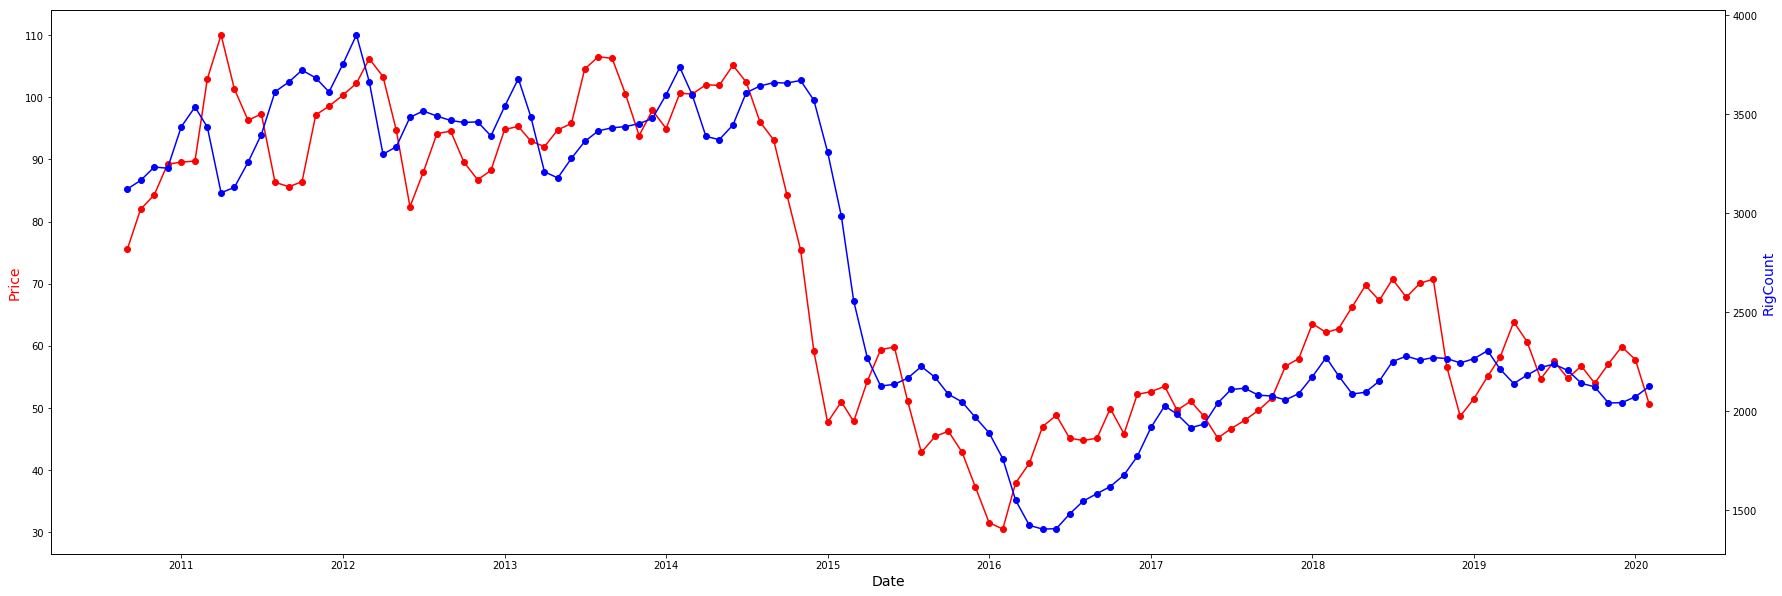

In [147]:
#plot rig count data against oil price
joined_RigCount_df.info
#plot the data
show_plot_twoYs (joined_RigCount_df, joined_RigCount_df.index, 'Price', 'RigCount', 'Rig Count')

In [148]:
#create rigcount file to append to df_all.csv
dfRigCount['date'] = dfRigCount.index
dfRigCount.reset_index(drop=True)
base_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
p = base_path + "\\data\\"
dfRigCount.to_csv(Path(p, 'RigCount' + '.csv'), index=False)
dfRigCount.head()

,RigCount,date
YearMonth,,
2010-09-01,3122,2010-09-01
2010-10-01,3165,2010-10-01
2010-11-01,3233,2010-11-01
2010-12-01,3227,2010-12-01
2011-01-01,3436,2011-01-01


In [149]:
#append file
file_names = ['df_all.csv', 'RigCount.csv']
cols = ['date', 'close', 'vader compound', 
        'usalorsgpnostsam',
        'world petroleum consumption', 
        'u.s. petroleum consumption',
        'value',
        'textblob polarity', 'RigCount']
data = pd.DataFrame()
dfs = []
base_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
p = base_path + "\\data\\"
for i in range(len(file_names)):
#     print(file_name)
    file_name = p + file_names[i]
    #print(file_name)
    df = pd.read_csv(file_name,
                    parse_dates = True,
                    infer_datetime_format = True)
    df.columns = df.columns.str.lower()

    n = []
    for c in cols:
        if df.columns.str.contains(c).any():
            n.append(df.columns.get_loc(c))
#             print(str('column ' + c))
#     df = df.iloc[:,n]
#     df = df.replace('NaN', np.nan)
#     df.dropna()
#     print(df.head())
    df.dropna(inplace=True)
    try:
        df['date'] = pd.to_datetime(df['date'], infer_datetime_format = True)
    except:
        print(df)

    df = df.set_index('date')
    df.sort_index(inplace = True)
#     print(df)
    dfs.append(df)
    if i == 0:
        data = df.copy()
    else:
        data.join(df, how='outer', rsuffix=str(i))
dfs

[                price        uup        gdp          prod     vader  \
 date                                                                  
 2010-08-24  71.630000  23.390000  99.634809   5574.800000  0.273200   
 2010-08-25  72.520000  23.430000  99.637228   5573.200000  0.015467   
 2010-08-26  73.360000  23.290000  99.639647   5571.600000  0.253233   
 2010-08-27  75.170000  23.320000  99.642066   5570.000000  0.700300   
 2010-08-28  75.013333  23.343333  99.644485   5568.400000  0.615400   
 2010-08-29  74.856667  23.366667  99.646904   5566.800000  0.530500   
 2010-08-30  74.700000  23.390000  99.649323   5565.200000  0.445600   
 2010-08-31  71.920000  23.370000  99.651742   5563.600000  0.273200   
 2010-09-01  73.910000  23.190000  99.654161   5562.000000  0.263843   
 2010-09-02  75.020000  23.170000  99.654993   5563.033333  0.254486   
 2010-09-03  74.600000  23.050000  99.655825   5564.066667  0.245129   
 2010-09-04  74.472500  23.112500  99.656657   5565.100000  0.23

In [150]:
dfs[-1]

,rigcount
date,
2010-09-01,3122
2010-10-01,3165
2010-11-01,3233
2010-12-01,3227
2011-01-01,3436
2011-02-01,3536
2011-03-01,3434
2011-04-01,3103
2011-05-01,3130


In [151]:
# data = pd.concat(dfs[:-1], join='outer', axis=1)
data = pd.concat([data,dfs[-1]], join='outer', axis=1)
data = pd.concat([data,dfHS], join='outer', axis=1)
data = data.rename(columns={'value': 'HousingStarts'})
df_all = data.loc['2010-09':'2020-09']
df_all['HousingStarts'] = df_all['HousingStarts'].interpolate(method='linear')
df_all['rigcount'] = df_all['rigcount'].interpolate(method='linear')
# print(df_all['gdp'].std())
# print(df_all['gdp'].mean())
# # df_all['gdp_prep'] = df_all['gdp'].interpolate(method='linear')
# # df_all['gdp_prep']=(df_all['gdp'] - df_all['gdp'].mean())/df_all['gdp'].std()
# df_all['gdp_prep'] = df_all['gdp']
# df_all.loc[(df_all['gdp'] - df_all['gdp'].mean() > df_all['gdp'].std()), 'gdp_prep'] = df_all['gdp'].mean() - df_all['gdp'].std()
df_all.tail(10)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,price,uup,gdp,prod,vader,textblob_polarity,rigcount,HousingStarts
2020-09-18,41.11,25.11,90.264283,10900.0,0.087697,0.091607,2125.0,1416.0
2020-09-19,40.51,25.17,90.264283,10900.0,0.151141,0.121224,2125.0,1416.0
2020-09-20,39.91,25.23,90.264283,10900.0,0.050010,0.026592,2125.0,1416.0
2020-09-21,39.31,25.29,90.264283,10900.0,0.115236,0.087074,2125.0,1416.0
2020-09-22,39.60,25.38,90.264283,10900.0,0.111223,0.078816,2125.0,1416.0
2020-09-23,39.93,25.52,90.264283,10900.0,0.005812,-0.012108,2125.0,1416.0
2020-09-24,40.31,25.48,90.264283,10900.0,0.138539,0.156957,2125.0,1416.0
2020-09-25,40.31,25.48,90.264283,10900.0,0.163099,0.102040,2125.0,1416.0
2020-09-26,40.31,25.48,90.264283,10900.0,0.277375,0.108401,2125.0,1416.0
2020-09-27,40.31,25.48,90.264283,10900.0,0.255410,0.167102,2125.0,1416.0


In [152]:
#read in df_all and add rigcount


# df_all_2010_2020 = pd.read_csv(Path(p,strFile), parse_dates=True, infer_datetime_format=True)
# df_all_2010_2020 = df_all_2010_2020.loc[(df_all_2010_2020['date'] >= '2010-09-01') & (df_all_2010_2020['date'] < '2020-02-01')]
# df_all_2010_2020 = df_all_2010_2020.round(decimals=2)
# # df_all_2019_2020['change'] = df_all_2019_2020['price'].pct_change()
# # df_all_2019_2020 = df_all_2019_2020.dropna(subset=['change'])
# df_all_2010_2020['YearMonth'] = df_all_2010_2020['date']
# df_all_2010_2020.drop(columns=['date'], axis=1, inplace=True)
# df_all_2010_2020.set_index('YearMonth', drop=True, inplace=True)
# df_all_2010_2020.head()

# base_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
# p = base_path + "\\data\\"
# p = p + 'df_all.csv'
# df_all, strEmpty = read_csv(p, 'date', '')
# df_all = df_all.loc['2010-09':'2020-02']
# print(df_all_2010_2020.head())
# print(dfRigCount.head())
# df_all_2010_2020.merge(dfRigCount, left_index=True, right_index=True)
# # join_all = pd.concat([df_all_2010_2020, dfRigCount], axis=1)
# print(join_all.head(100))
# # dfNormalGDP = normalize_data(joined_GDP_df)
# # dfNormalOilProd = normalize_data(joined_Oil_Production_df)
# # dfNormalRigCount = normalize_data(joined_RigCount_df)
# # dfNormalHousingStarts = normalize_data(joined_HousingStarts_df)

In [153]:
import sklearn
import sklearn.preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [154]:
# split data in 80%/10%/10% train/validation/test sets
valid_set_size_percentage = 10 
test_set_size_percentage = 10 

In [155]:
#Normalize all features
# function for min-max normalization of stock
def normalize_data(df, cols):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    for c in cols:
        df[c] = min_max_scaler.fit_transform(df[c].values.reshape(-1,1))
    return df

In [156]:
#instantiate all normalized dataframes
# create a df to normalize
df_normalized = df_all.copy()
df_sent = df_normalized[['vader', 'textblob_polarity']]
# print(df_sent.head())
df_normalized.drop(['vader'],1,inplace=True)
df_normalized.drop(['textblob_polarity'],1,inplace=True)
# normalize data
df_2 = df_normalized.copy()

cols = list(df_2.columns.values)
df_norm = normalize_data(df_2, cols)
print(df_norm.tail(100))

               price       uup  gdp      prod  rigcount  HousingStarts
2020-06-20  0.510623  0.775075  0.0  0.724192  0.288577       0.810697
2020-06-21  0.510689  0.769099  0.0  0.724192  0.288577       0.817576
2020-06-22  0.515241  0.763124  0.0  0.724192  0.288577       0.824455
2020-06-23  0.514648  0.751601  0.0  0.724192  0.288577       0.831333
2020-06-24  0.499076  0.766965  0.0  0.724192  0.288577       0.838212
2020-06-25  0.503761  0.772087  0.0  0.724192  0.288577       0.845091
2020-06-26  0.502243  0.777209  0.0  0.724192  0.288577       0.851970
2020-06-27  0.500132  0.777636  0.0  0.724192  0.288577       0.858848
2020-06-28  0.498021  0.778062  0.0  0.724192  0.288577       0.865727
2020-06-29  0.510227  0.778489  0.0  0.724192  0.288577       0.872606
2020-06-30  0.507390  0.773367  0.0  0.724192  0.288577       0.879485
2020-07-01  0.511019  0.765685  0.0  0.724192  0.288577       0.886364
2020-07-02  0.516495  0.768246  0.0  0.718685  0.288577       0.884135
2020-0

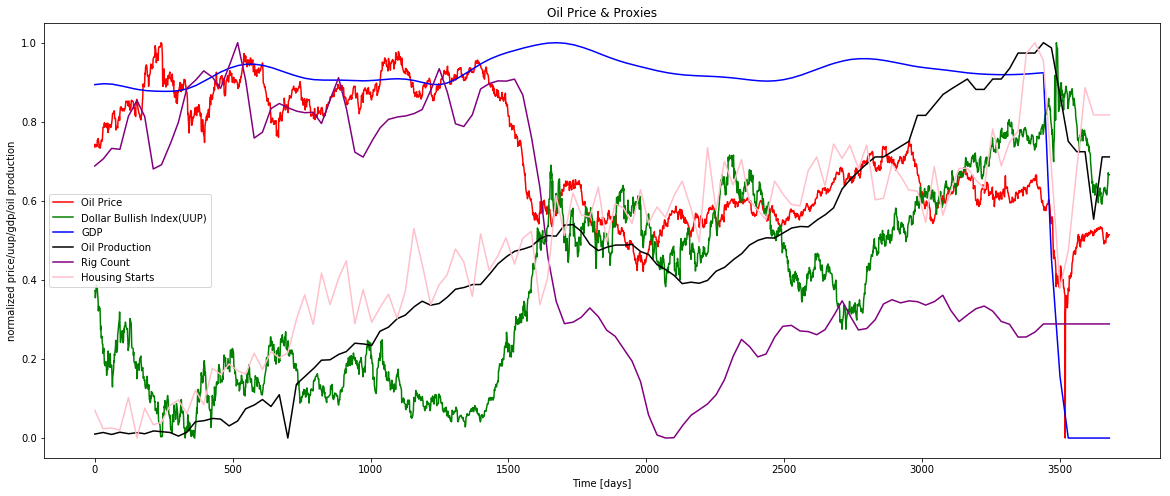

In [157]:
plt.figure(figsize=(20, 8));
plt.plot(df_norm.price.values, color='red', label='Oil Price')
plt.plot(df_norm.uup.values, color='green', label='Dollar Bullish Index(UUP)')
plt.plot(df_norm.gdp.values, color='blue', label='GDP')
plt.plot(df_norm['prod'].values, color='black', label='Oil Production')
plt.plot(df_norm['rigcount'].values, color='purple', label='Rig Count')
plt.plot(df_norm['HousingStarts'].values, color='pink', label='Housing Starts')
plt.title('Oil Price & Proxies')
plt.xlabel('Time [days]')
plt.ylabel('normalized price/uup/gdp/oil production')
plt.legend(loc='best')
plt.show()


In [158]:
#establish correlation
#add sentiment back
df_norm = pd.concat([df_norm, df_sent], axis=1)
# print(df_norm.head())

In [159]:
cols = list(df_norm.columns.values)
print('df_normalized.columns.values = ', cols)
correlation = df_norm.corr(method='pearson'); #'kendall', 'spearman', 'pearson'
print("Pearson correlation coefficient:")
print(correlation['price'])

df_normalized.columns.values =  ['price', 'uup', 'gdp', 'prod', 'rigcount', 'HousingStarts', 'vader', 'textblob_polarity']
Pearson correlation coefficient:
price                1.000000
uup                 -0.869662
gdp                  0.320532
prod                -0.657462
rigcount             0.879411
HousingStarts       -0.686069
vader                0.237696
textblob_polarity    0.195925
Name: price, dtype: float64


In [160]:
#drop any column with a low correlation
colList = []
correlation_floor = 0.4
for i in correlation.columns:
    corr = abs(correlation[i][0].astype(float))
    if corr < correlation_floor:
        colList.append(str(i))    
print(f'List of features with a correlation value less than 0.4 {colList}')
for d in colList:
    df_norm.drop(d, axis=1, inplace=True)
df_norm.head()

List of features with a correlation value less than 0.4 ['gdp', 'vader', 'textblob_polarity']


,price,uup,prod,rigcount,HousingStarts
2010-09-01,0.735946,0.372599,0.009982,0.688176,0.070000
2010-09-02,0.743270,0.370038,0.010117,0.688751,0.068455
2010-09-03,0.740499,0.354673,0.010253,0.689325,0.066909
2010-09-04,0.739658,0.362676,0.010389,0.689900,0.065364
2010-09-05,0.738816,0.370679,0.010524,0.690474,0.063818


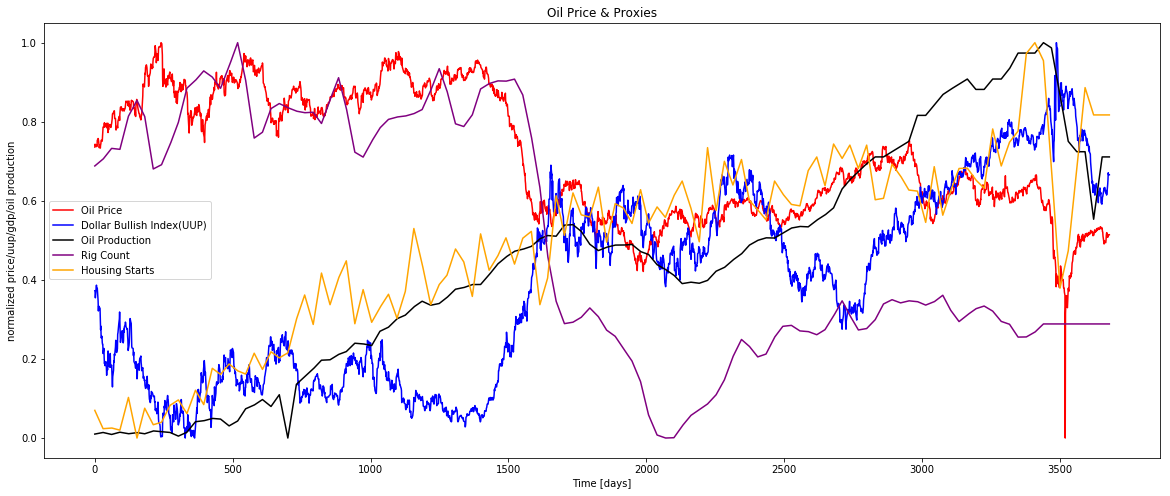

<Figure size 432x288 with 0 Axes>

In [168]:
plt.figure(figsize=(20, 8));
plt.plot(df_norm.price.values, color='red', label='Oil Price')
plt.plot(df_norm.uup.values, color='blue', label='Dollar Bullish Index(UUP)')
plt.plot(df_norm['prod'].values, color='black', label='Oil Production')
plt.plot(df_norm['rigcount'].values, color='purple', label='Rig Count')
plt.plot(df_norm['HousingStarts'].values, color='orange', label='Housing Starts')
plt.title('Oil Price & Proxies')
plt.xlabel('Time [days]')
plt.ylabel('normalized price/uup/gdp/oil production')
plt.legend(loc='best')
plt.show()

In [162]:
# This function accepts the column number for the features (X) and the target (y)
# It chunks the data up with a rolling window of Xt-n to predict Xt
# It returns a numpy array of X any y
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [163]:
# Predict Closing Prices using a 30 day window of previous closing prices
window_size = 20
split = 252
target_column = 0 # Column index 0 is the `price` column 

feature_column = 0
X, y = window_data(df_norm, window_size, feature_column, target_column)

In [164]:
# 
X_train = X[:-split]
X_test = X[-split:]

y_train = y[:-split]
y_test = y[-split:]

In [165]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
model = Sequential()

scaler.fit(X)
# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Fit the MinMaxScaler object with the target data Y
scaler.fit(y)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)
# Reshape the features for the model
# YOUR CODE HERE!
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
df_p = df_normalized.iloc[-len(real_prices):,0].to_frame()

In [166]:
df_p.head()

,price
2020-01-20,58.39
2020-01-21,58.34
2020-01-22,56.74
2020-01-23,55.59
2020-01-24,54.19


In [167]:
# Initial model setup
number_units = 55  
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

epochs = 35
batch_size=30
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

for f_col in df_norm.columns:
    #f_col = "uup"
    # Predict Closing Prices using a 30 day window of previous closing prices

    feature_column = df_norm.columns.get_loc(f_col)

    X, y = window_data(df_norm, window_size, feature_column, target_column)

    X_train = X[:-split]
    X_test = X[-split:]

    y_train = y[:-split]
    y_test = y[-split:]

    scaler.fit(X)
    # Scale the features training and testing sets
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    # Fit the MinMaxScaler object with the target data Y
    scaler.fit(y)

    # Scale the target training and testing sets
    y_train = scaler.transform(y_train)
    y_test = scaler.transform(y_test)
    
    # Reshape the features for the model
    # YOUR CODE HERE!
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Train the model
    # epochs = 35
    # batch_size=30
    training_history = model.fit(X_train, y_train, 
              epochs=epochs, shuffle=False,
              validation_data=(X_test, y_test),
              batch_size=batch_size, verbose=1)
    #model.fit(X_train, y_train, epochs = 35, batch_size = 30)

    # Evaluate the model
    model.evaluate(X_test, y_test, verbose=1)

    # Make some predictions
    predicted = model.predict(X_test)

    # Recover the original prices instead of the scaled version
    predicted_prices = scaler.inverse_transform(predicted)
    real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Create a DataFrame of Real and Predicted values
    p_col = f_col + "_p"

    df_p[p_col] = predicted_prices.ravel()

    u_col = f_col + "_u"
    df_p[u_col] = np.nan
    # Initialize variable to hold previous price
    previous_price = 0
    for index, row in df_p.iterrows():

        if previous_price == 0:
            df_p.loc[index, u_col] = 0
        elif row[p_col] < previous_price:
            df_p.loc[index, u_col] = -1
        elif row[p_col] > previous_price:
            df_p.loc[index, u_col] = 1
        else:
            df_p.loc[index, u_col] = 0

        previous_price = row[p_col]

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(20, 8));
plt.plot(df_p.price_u.values, color='red', label='Real Price')
plt.plot(df_p.uup_u.values, color='green', label='Dollar Bullish Index(UUP)')
plt.plot(df_p['prod_u'].values, color='black', label='Oil Production')
plt.plot(df_p['rigcount_u'].values, color='purple', label='Rig Count')
plt.title('Oil Price & Proxies - RNN')
plt.xlabel('Time [days]')
plt.ylabel('price/uup/oil production')
plt.legend(loc='best')
plt.show()

In [ ]:
df_p['daily_return'] = df_p['price'].pct_change()
df_p.head()

In [ ]:
trading_signals_df = df_p
# Set x variable list of features
x_var_list = ['price_u', 'uup_u', 'prod_u', 'rigcount_u']

# Filter by x-variable list
trading_signals_df[x_var_list].tail()
trading_signals_df.to_csv('rnn_results.csv', sep=',')

In [ ]:
#establish correlation
corrrelation    = trading_signals_df.corr(method='pearson'); #'kendall', 'spearman', 'pearson'
print("Pearson correlation coefficient:")
print(corrrelation['price_u'])

In [ ]:
# Shift DataFrame values by 1
trading_signals_df[x_var_list] = trading_signals_df[x_var_list].shift(1)
trading_signals_df[x_var_list].tail()

In [ ]:
# Drop NAs and replace positive/negative infinity values
trading_signals_df.dropna(subset=x_var_list, inplace=True)
trading_signals_df.dropna(subset=['daily_return'], inplace=True)
trading_signals_df = trading_signals_df.replace([np.inf, -np.inf], np.nan)
trading_signals_df.head()

In [ ]:
# Construct the dependent variable where if daily return is greater than 0, then 1, else, 0.
trading_signals_df['Positive Return'] = np.where(trading_signals_df['daily_return'] > 0, 1.0, 0.0)
trading_signals_df.head()